<h1>lgbm baseline</h1>

<h1>DATA LOADING

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.listdir('../../data')
assert 'out_breed.csv' in os.listdir('../../data') # this assert breaks if the data is configured uncorrectly

In [3]:
breeds = pd.read_csv('../../data/out_breed.csv')
colors = pd.read_csv('../../data/out_color.csv')
states = pd.read_csv('../../data/out_state.csv')
train  = pd.read_csv('../../data/out_train.csv')
test   = pd.read_csv('../../data/out_test.csv')
sub    = pd.read_csv('../../data/out_submission.csv')

<h1>MODEL</h1>

In [4]:
from lgbmModel import PredictiveModel

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


<h1>EXAMPLE USAGE</h1>

In [6]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [7]:
model = PredictiveModel("example_usage_model")
model.train(X, Y)
predictions = model.predict(X_test)
assert len(predictions)

Wed Mar 20 23:19:47 2019 [example_usage_model.__init__] initialized succesfully


/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


<h1>VALIDATION

In [5]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [6]:
model = PredictiveModel("validation_model_lgbm_baseline")

Wed Mar 20 23:34:28 2019 [validation_model_lgbm_baseline.__init__] initialized succesfully


In [7]:
model.params

{'objective': 'multiclass', 'verbose': 1, 'num_class': 5, 'num_rounds': 50}

In [8]:
#model.validation(X, Y, method=2, verbose=True)

In [9]:
model.validation(X, Y, n_folds=1, verbose=True)

Wed Mar 20 23:34:30 2019 [validation_model_lgbm_baseline.validation] start validation method 1


/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Wed Mar 20 23:34:31 2019 [validation_model_lgbm_baseline.validation] single score = 0.1554495971018497 
Wed Mar 20 23:34:31 2019 [validation_model_lgbm_baseline.validation] validation score = 0.1554495971018497 
Wed Mar 20 23:34:31 2019 [validation_model_lgbm_baseline.validation] finished validation method 1


0.1554495971018497

printing training results..


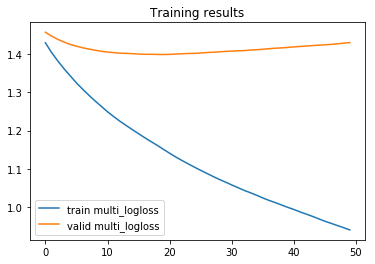

printing feature importance..


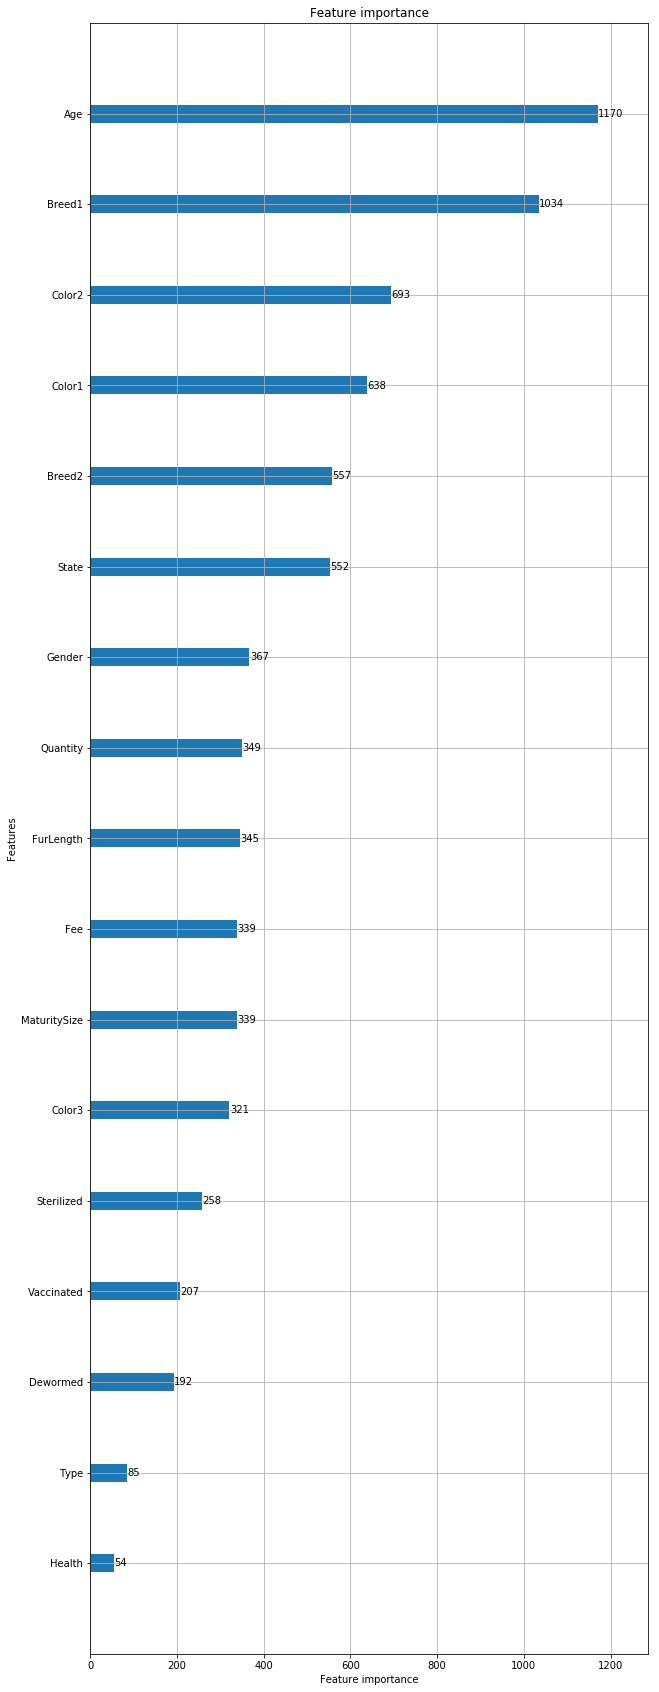

In [11]:
%matplotlib inline
model.visualize()

<h1>How to use lightgbm library

In [14]:
import lightgbm as lgb

In [75]:
len(X)

14993

In [76]:
lgb_train = lgb.Dataset(X[:-1000], Y[:-1000])
lgb_validation = lgb.Dataset(X.iloc[-1000:], Y.iloc[-1000:])

In [77]:
params_1 = {
            'objective': 'multiclass',
            'verbose': 1,
            'num_class': 5,
            'num_rounds':50
        }

In [84]:
lgb.cv(params_1, lgb_train)

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/lightgbm/engine.py:430: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'multi_logloss-mean': [1.453883219176015,
  1.4434985907435414,
  1.4344527901076731,
  1.426590694378433,
  1.419740156153806,
  1.4137498378268352,
  1.408606751991782,
  1.403812546530337,
  1.3999681279664375,
  1.3964026914347534,
  1.3931042256244306,
  1.390133193613503,
  1.3874459558536014,
  1.3849441355308618,
  1.3828509835642238,
  1.3807955360944217,
  1.378994238196668,
  1.3774590877168043,
  1.375758579965044,
  1.3742300113904473,
  1.372801043557439,
  1.3714483039907157,
  1.3704213043609643,
  1.369412333519891,
  1.3685684635381912,
  1.367623050489046,
  1.3668422354905272,
  1.366079805477388,
  1.3654847717276515,
  1.3649522536514642,
  1.364432496875012,
  1.3640018258863589,
  1.3634603337204845,
  1.3631886339696782,
  1.3626117176670633,
  1.3622125745054459,
  1.3617254064772732,
  1.3613515392128757,
  1.3609016645393752,
  1.3605843288460435,
  1.3603006763073524,
  1.3601598495674867,
  1.3599301367826624,
  1.3596688106781687,
  1.3595780980961973,
 

In [78]:
train_results = {}
model = lgb.train(params_1, lgb_train, evals_result = train_results, valid_sets = [lgb_train, lgb_validation], valid_names=('train','valid'), verbose_eval=1)

[1]	train's multi_logloss: 1.45014	valid's multi_logloss: 1.44186
[2]	train's multi_logloss: 1.43633	valid's multi_logloss: 1.43232
[3]	train's multi_logloss: 1.42418	valid's multi_logloss: 1.42396
[4]	train's multi_logloss: 1.41327	valid's multi_logloss: 1.4169
[5]	train's multi_logloss: 1.40306	valid's multi_logloss: 1.41006
[6]	train's multi_logloss: 1.39464	valid's multi_logloss: 1.4049
[7]	train's multi_logloss: 1.3866	valid's multi_logloss: 1.4007
[8]	train's multi_logloss: 1.37952	valid's multi_logloss: 1.39643
[9]	train's multi_logloss: 1.37265	valid's multi_logloss: 1.39227
[10]	train's multi_logloss: 1.36645	valid's multi_logloss: 1.38862
[11]	train's multi_logloss: 1.3605	valid's multi_logloss: 1.38573
[12]	train's multi_logloss: 1.35474	valid's multi_logloss: 1.38296
[13]	train's multi_logloss: 1.34938	valid's multi_logloss: 1.3806
[14]	train's multi_logloss: 1.34458	valid's multi_logloss: 1.37777
[15]	train's multi_logloss: 1.33968	valid's multi_logloss: 1.37526
[16]	train

In [71]:
train_results

{'train': defaultdict(list,
             {'multi_logloss': [1.449211671320533,
               1.4355854260341274,
               1.4233039830244536,
               1.4125042525771594,
               1.403031832712716,
               1.3945120274737004,
               1.3869351745444727,
               1.3799327995141506,
               1.3729019950462695,
               1.366700242198402,
               1.3607868451321037,
               1.3554803244091,
               1.3504166052937803,
               1.3456056529842526,
               1.3410664136305102,
               1.3367830584507878,
               1.3325041099795656,
               1.328498202936811,
               1.3247002539876798,
               1.3208098982626957,
               1.3173220070114218,
               1.3138600134788603,
               1.3108021861583576,
               1.3072787237974455,
               1.304069089986533,
               1.3011820689931808,
               1.2979316254691666,
               1.2

In [79]:
preds = model.predict(X)
print(preds)

[[0.02296437 0.21962677 0.3132414  0.1747522  0.26941526]
 [0.06181224 0.36380136 0.24756899 0.14750072 0.17931671]
 [0.01701901 0.24854638 0.3364091  0.32246144 0.07556407]
 ...
 [0.05372216 0.18061949 0.21408763 0.12863282 0.42293789]
 [0.02809258 0.13040271 0.24354865 0.21277875 0.38517731]
 [0.0234218  0.27866807 0.35732416 0.21941615 0.12116981]]


In [80]:
from sklearn.metrics import accuracy_score as ac

In [81]:
ac(Y, np.argmax(preds, axis=1))

0.4757553524978323